In [1]:
import numpy as np
import pyemma
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
dtrajs = np.load('run2_dtrajs.npy')

/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.5, you have 2.5.2.
  .format(latest=latest, current=current), category=UserWarning)


In [3]:
dtrajs = [np.concatenate(x) for x in dtrajs]

In [4]:
its = pyemma.msm.its(dtrajs)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

18-03-19 15:36:54 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[1] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


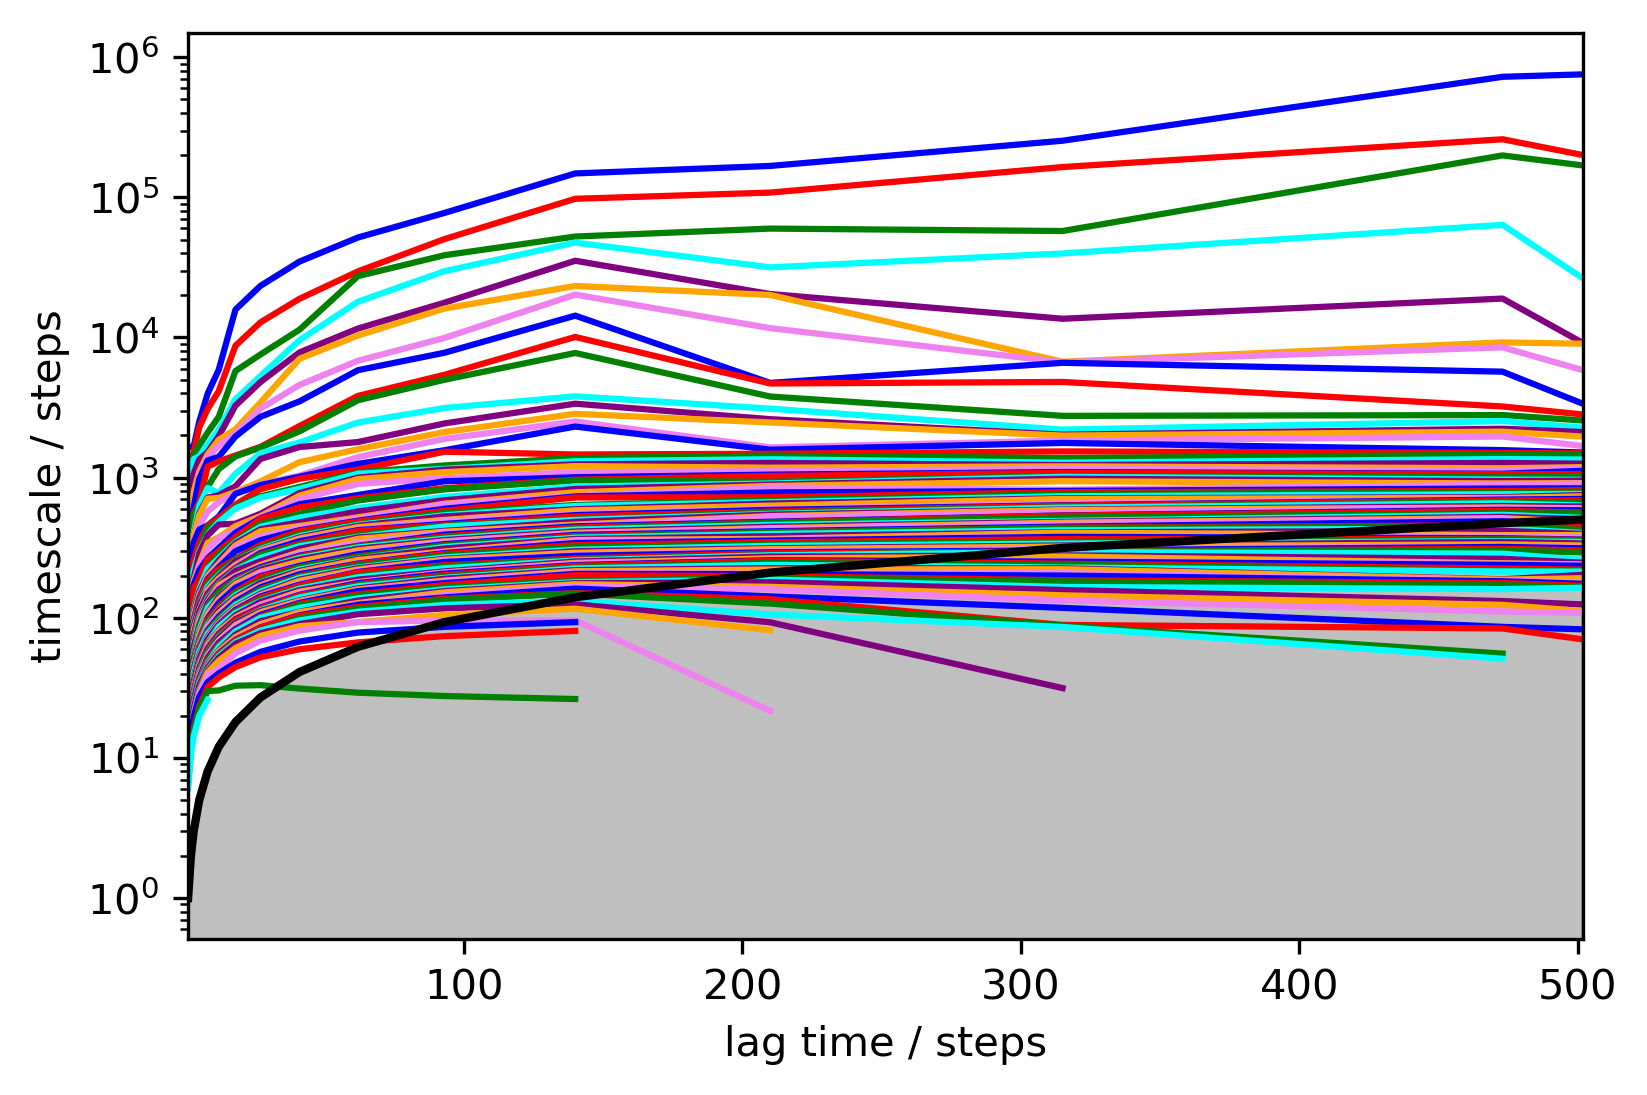

In [5]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its)

In [224]:
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100, mincount_connectivity=40)

In [225]:
msm.timescales()[0]

4071.413287338467

In [226]:
msm.nstates

79

In [227]:
msm.active_count_fraction

0.9152081766425757

In [228]:
#emp_pi = np.array([Counter(np.concatenate(dtrajs))[x] for x in range(100)])
#emp_pi = emp_pi / np.sum(emp_pi)

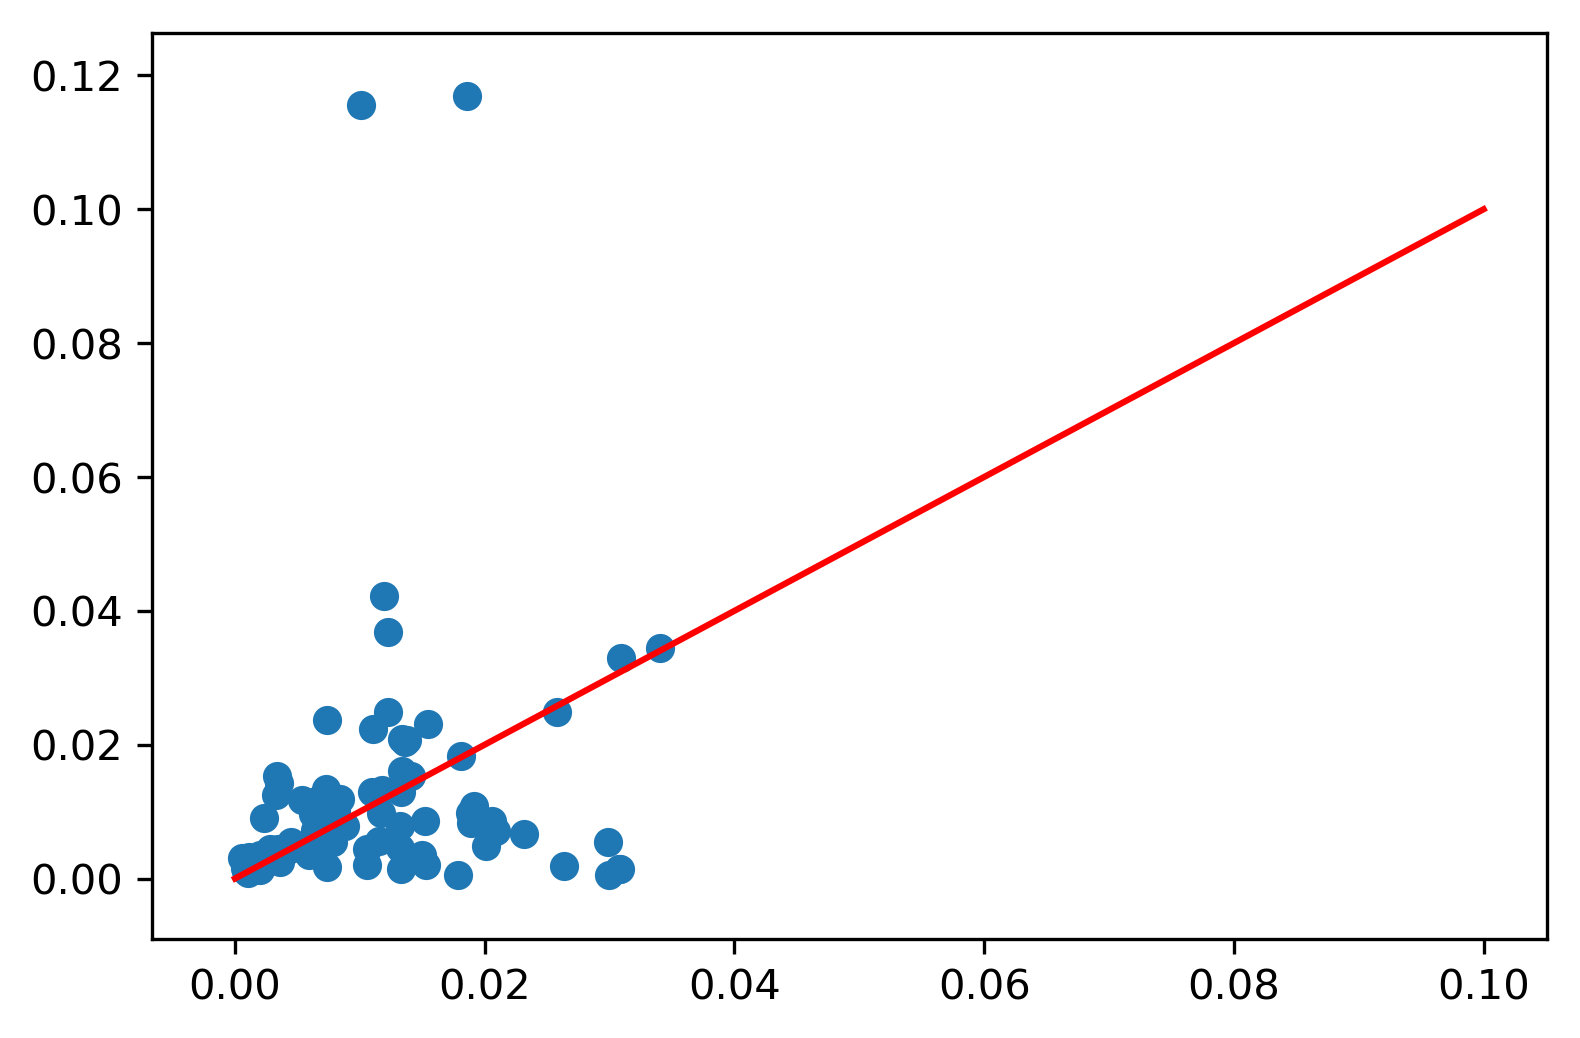

In [229]:
plt.figure(dpi=300)
plt.scatter(emp_pi[msm.active_set],msm.pi)
plt.plot([0,0.1], [0,0.1], color='red')

In [211]:
# top timescale is as low as with the random forest selected contacts - go with those